# Getting Started With Exploratory Data Analysis (EDA)

<a href="https://colab.research.google.com/github/BU-Spark/ml-549-course/blob/main/phase3_EDA/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook serves as a starter guide or template for exploratory data analysis. It will go over the topics mentioned in the EDA guide. 

In [1]:
# let's start off by importing the libraries we will need for eda
import pandas as pd
import numpy as np 

# for visualizations : 
import seaborn as sns
import matplotlib.pyplot as plt

The dataset we will be using in this tutorial is from Analyze Boston. Analyze Boston is the City of Boston's data hub and is a great resource for data sets regarding the city. 

We will be working with the 2022 311 Service Requests dataset. The dataset consists of service requests from all channels of engagement. 311 allows you to report non-emergency issues or request non-emergency City services. 

Link: https://data.boston.gov/dataset/311-service-requests 

In [3]:
import os
import requests
from tqdm import tqdm

def download_csv(url, filename):
    # Check if the file already exists
    if os.path.exists(filename):
        print(f"The file {filename} already exists.")
        return

    response = requests.get(url, stream=True)

    total_size_in_bytes= int(response.headers.get('content-length', 0))
    block_size = 1024 #1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

    with open(filename, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, something went wrong")

# Use the function
url = "https://data.boston.gov/datastore/dump/81a7b022-f8fc-4da5-80e4-b160058ca207?bom=True"
filename = "311-requests.csv"
download_csv(url, filename)

The file 311-requests.csv already exists.


In [4]:
# read in dataset
df = pd.read_csv('311-requests.csv') 

/var/folders/ly/jkydg4dj2vs93b_ds7yp5t7r0000gn/T/ipykernel_49480/924790900.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311-requests.csv')


In [5]:
# let's look at the first five rows of the dataset
df.head()

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,1,101004113346,2022-01-01 01:24:16,2022-01-04 03:30:00,2022-01-03 04:12:52,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 09:12:52...,Parking Enforcement,Transportation - Traffic Division,...,Charlestown,2,2,0205,INTERSECTION Elm St & Bartlett St,NaN,42.377998,-71.063353,0101000020E610000072405BF80DC451C0D275123C6230...,Citizens Connect App
1,2,101004113347,2022-01-01 01:40:20,NaN,2022-01-10 11:30:15,ONTIME,Closed,Case Closed. Closed date : 2022-01-10 16:30:15...,Schedule Bulk Item Pickup,Public Works Department,...,Jamaica Plain,11,Ward 19,1902,6 Moss Hill Rd,2130.0,42.311350,-71.124971,0101000020E6100000AE191D85FFC751C0E259DD4DDA27...,Self Service
2,3,101004113348,2022-01-01 01:46:29,2022-01-05 03:30:00,2022-01-01 10:10:16,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 15:10:16...,Improper Storage of Trash (Barrels),Public Works Department,...,Beacon Hill,3,Ward 3,0306,14 S Russell St,2114.0,42.360720,-71.065880,0101000020E6100000BAC0AB6237C451C01BADBB0E2C2E...,Citizens Connect App
3,4,101004113349,2022-01-01 01:48:38,2022-01-04 03:30:00,2022-01-01 09:37:26,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 14:37:26...,Empty Litter Basket,Public Works Department,...,Back Bay,6,5,0501,INTERSECTION Bay St & Fayette St,NaN,42.348241,-71.068550,0101000020E61000009E51771E63C451C0C9B81F28932C...,Citizens Connect App
4,5,101004113351,2022-01-01 02:19:00,2022-01-17 03:30:00,2022-08-05 06:47:07,OVERDUE,Closed,Case Closed. Closed date : 2022-08-05 10:47:07...,Sign Repair,Transportation - Traffic Division,...,West Roxbury,12,Ward 20,2015,223 Grove St,2132.0,42.261900,-71.157421,0101000020E61000000B500D2F13CA51C0EF75A8ED8521...,Constituent Call


How many observations/rows are there? <br>

How many variables/columns are there? <br>

What kinds of variables are there? Qualitative? Quantitative? Both? <br>

In [6]:
# number of observations 
df.shape[0]

276599

In [7]:
# to see column name, count, and dtype of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276599 entries, 0 to 276598
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   _id                             276599 non-null  int64  
 1   case_enquiry_id                 276599 non-null  int64  
 2   open_dt                         276599 non-null  object 
 3   sla_target_dt                   242468 non-null  object 
 4   closed_dt                       255570 non-null  object 
 5   on_time                         276599 non-null  object 
 6   case_status                     276599 non-null  object 
 7   closure_reason                  276599 non-null  object 
 8   case_title                      276595 non-null  object 
 9   subject                         276599 non-null  object 
 10  reason                          276599 non-null  object 
 11  type                            276599 non-null  object 
 12  queue           

There are 146373 rows (observations). <br>

There are 29 columns (variables). <br> 

There are both categorical and numerical variables. At quick glance there seems to be more categorical variables than numerical variables. 

Categorical Variables:
```case_status```, ```neighborhood```, ```source```, etc. 

Numerical Variables: 
... maybe not?

The ```case_enquiry_id``` is a unique identifier for each row, ```closedphoto``` has 0 non-null values so it might be worth it to drop this column since there is no additional information we can gather, columns such as ```location_zipcode```, ```latitude```, ```longitude``` not exactly numeric varaibles, since they are numbers that represent different codes. 

### Cleaning 

Let's convert the three time variables (```open_dt```, ```target_dt```, and ```closed_dt```) from objects to pandas datetime objects.
Let's focus on service requests for a set period of time in 2022. 
We will start by filtering for service requests that were opened from January 2022 to March 2022. 

In [10]:
# changing the three columns with dates and times to pandas datetime object 
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['sla_target_dt'] = pd.to_datetime(df['sla_target_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

# output is long, but run the line below to check the type of the three columns 
df.dtypes

_id                                        int64
case_enquiry_id                            int64
open_dt                           datetime64[ns]
sla_target_dt                     datetime64[ns]
closed_dt                         datetime64[ns]
on_time                                   object
case_status                               object
closure_reason                            object
case_title                                object
subject                                   object
reason                                    object
type                                      object
queue                                     object
department                                object
submitted_photo                           object
closed_photo                              object
location                                  object
fire_district                             object
pwd_district                              object
city_council_district                     object
police_district     

In [9]:
# filter data for 311 requests from january 2022 to march 2022 
df_filtered = df.loc[(df['open_dt'] >= '2022-01-01') &
                  (df['open_dt'] < '2022-03-31')]
df_filtered.head()

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,1,101004113346,2022-01-01 01:24:16,2022-01-04 03:30:00,2022-01-03 04:12:52,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 09:12:52...,Parking Enforcement,Transportation - Traffic Division,...,Charlestown,2,2,0205,INTERSECTION Elm St & Bartlett St,NaN,42.377998,-71.063353,0101000020E610000072405BF80DC451C0D275123C6230...,Citizens Connect App
1,2,101004113347,2022-01-01 01:40:20,NaT,2022-01-10 11:30:15,ONTIME,Closed,Case Closed. Closed date : 2022-01-10 16:30:15...,Schedule Bulk Item Pickup,Public Works Department,...,Jamaica Plain,11,Ward 19,1902,6 Moss Hill Rd,2130.0,42.311350,-71.124971,0101000020E6100000AE191D85FFC751C0E259DD4DDA27...,Self Service
2,3,101004113348,2022-01-01 01:46:29,2022-01-05 03:30:00,2022-01-01 10:10:16,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 15:10:16...,Improper Storage of Trash (Barrels),Public Works Department,...,Beacon Hill,3,Ward 3,0306,14 S Russell St,2114.0,42.360720,-71.065880,0101000020E6100000BAC0AB6237C451C01BADBB0E2C2E...,Citizens Connect App
3,4,101004113349,2022-01-01 01:48:38,2022-01-04 03:30:00,2022-01-01 09:37:26,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 14:37:26...,Empty Litter Basket,Public Works Department,...,Back Bay,6,5,0501,INTERSECTION Bay St & Fayette St,NaN,42.348241,-71.068550,0101000020E61000009E51771E63C451C0C9B81F28932C...,Citizens Connect App
4,5,101004113351,2022-01-01 02:19:00,2022-01-17 03:30:00,2022-08-05 06:47:07,OVERDUE,Closed,Case Closed. Closed date : 2022-08-05 10:47:07...,Sign Repair,Transportation - Traffic Division,...,West Roxbury,12,Ward 20,2015,223 Grove St,2132.0,42.261900,-71.157421,0101000020E61000000B500D2F13CA51C0EF75A8ED8521...,Constituent Call


From our previous observation, since ```closedphoto``` column does not contain any non-null values, let's drop it. 

In [12]:
# drop closedphoto column
df_filtered = df_filtered.drop(columns=['closed_photo'])

After filtering the service requests, let's see how many observations we are left with.  

In [13]:
# how many requests were opened from Jan 2022 to March 2022
df_filtered.shape[0]

66464

From a quick preview of the dataframe, we can see that some of the requests are still open. 
Let's see how many observations are open vs. closed and then how many are ontime vs. overdue from the set of requests from January 2022 to March 2022. 

In [15]:
# checking how many open vs. closed cases
df_filtered['case_status'].value_counts()

case_status
Closed    61070
Open       5394
Name: count, dtype: int64

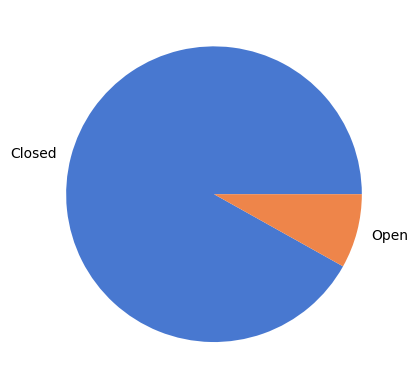

In [16]:
# visualize case_status in pie chart, set color palette 
colors = sns.color_palette('muted')[0:5]
ax = df_filtered['case_status'].value_counts().plot.pie(colors=colors)
ax.yaxis.set_visible(False)

In [19]:
# checking how many ontime vs. overdue cases 
df_filtered['on_time'].value_counts()

on_time
ONTIME     54851
OVERDUE    11613
Name: count, dtype: int64

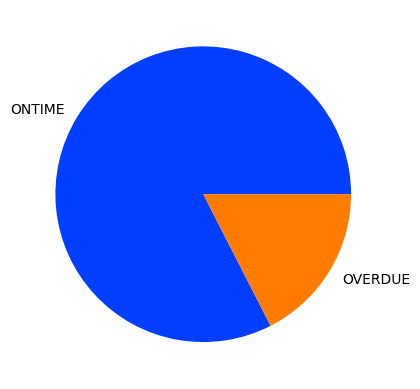

In [21]:
# visualize ontime in pie chart, set color palette 
colors = sns.color_palette('bright')[0:5]
ax = df_filtered['on_time'].value_counts().plot.pie(colors=colors)
ax.yaxis.set_visible(False)

### Descriptive Statistics 

Pandas makes this easy! We can use ```describe()``` to get the descriptive statistics of the numerical columns. 

In [22]:
df_filtered.describe()

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,location_zipcode,latitude,longitude
count,66464.000000,6.646400e+04,66464,59450,61070,49782.000000,65984.000000,65984.000000
mean,33232.500000,1.010042e+11,2022-02-15 20:05:04.159379456,2022-03-08 19:53:51.031976192,2022-02-27 20:19:35.245472512,2126.916998,42.328284,-71.081085
min,1.000000,1.010041e+11,2022-01-01 01:24:16,2022-01-02 04:10:15,2022-01-01 04:06:21,2108.000000,42.231447,-71.189553
25%,16616.750000,1.010042e+11,2022-01-29 16:03:12.750000128,2022-02-02 08:08:11.249999872,2022-01-31 14:55:41.500000,2119.000000,42.303930,-71.102281
50%,33232.500000,1.010042e+11,2022-02-14 14:05:00,2022-02-22 03:30:00,2022-02-17 16:16:52.500000,2126.000000,42.334435,-71.073561
75%,49848.250000,1.010042e+11,2022-03-08 08:48:40.500000,2022-03-16 11:23:42.500000,2022-03-14 10:46:45,2130.000000,42.351632,-71.057221
max,66464.000000,1.010042e+11,2022-03-30 22:56:00,2024-03-19 16:43:37,2023-09-06 11:39:21,2467.000000,42.398123,-70.984134
std,19186.648483,3.744107e+04,NaN,NaN,NaN,17.177999,0.033024,0.035013


As mentioned before, the ```case_enquiry_id```, ```location_zipcode```, ```latitude```, and ```longitude``` columns are not numeric variables. The descriptive statistics are not very useful in this situation. 

What would be a useful numeric variable is the duration of a request. Let's calculate the duration of each of the requests from January 2022 to March 2022 and add it as a new column in our dataframe. 

In [23]:
# calculating case duration and adding a new column (case_duration) to the dataframe 
duration = df_filtered['closed_dt'] - df_filtered['open_dt']
df_filtered = df_filtered.assign(case_duration=duration)
df_filtered.head()

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,case_duration
0,1,101004113346,2022-01-01 01:24:16,2022-01-04 03:30:00,2022-01-03 04:12:52,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 09:12:52...,Parking Enforcement,Transportation - Traffic Division,...,2,2,0205,INTERSECTION Elm St & Bartlett St,NaN,42.377998,-71.063353,0101000020E610000072405BF80DC451C0D275123C6230...,Citizens Connect App,2 days 02:48:36
1,2,101004113347,2022-01-01 01:40:20,NaT,2022-01-10 11:30:15,ONTIME,Closed,Case Closed. Closed date : 2022-01-10 16:30:15...,Schedule Bulk Item Pickup,Public Works Department,...,11,Ward 19,1902,6 Moss Hill Rd,2130.0,42.311350,-71.124971,0101000020E6100000AE191D85FFC751C0E259DD4DDA27...,Self Service,9 days 09:49:55
2,3,101004113348,2022-01-01 01:46:29,2022-01-05 03:30:00,2022-01-01 10:10:16,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 15:10:16...,Improper Storage of Trash (Barrels),Public Works Department,...,3,Ward 3,0306,14 S Russell St,2114.0,42.360720,-71.065880,0101000020E6100000BAC0AB6237C451C01BADBB0E2C2E...,Citizens Connect App,0 days 08:23:47
3,4,101004113349,2022-01-01 01:48:38,2022-01-04 03:30:00,2022-01-01 09:37:26,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 14:37:26...,Empty Litter Basket,Public Works Department,...,6,5,0501,INTERSECTION Bay St & Fayette St,NaN,42.348241,-71.068550,0101000020E61000009E51771E63C451C0C9B81F28932C...,Citizens Connect App,0 days 07:48:48
4,5,101004113351,2022-01-01 02:19:00,2022-01-17 03:30:00,2022-08-05 06:47:07,OVERDUE,Closed,Case Closed. Closed date : 2022-08-05 10:47:07...,Sign Repair,Transportation - Traffic Division,...,12,Ward 20,2015,223 Grove St,2132.0,42.261900,-71.157421,0101000020E61000000B500D2F13CA51C0EF75A8ED8521...,Constituent Call,216 days 04:28:07


Now we can see the new ```case_duration``` column. Some values are ```NaT```, which means there is a missing date. This makes sense because the ```case_status``` is ```OPEN```. 

Let's filter out the open cases and focus on analyzing the duration of the closed cases. 

In [24]:
# filter out the open cases
df_closed = df_filtered.loc[(df_filtered['case_status'] == "Closed")]
df_closed.head()

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,case_duration
0,1,101004113346,2022-01-01 01:24:16,2022-01-04 03:30:00,2022-01-03 04:12:52,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 09:12:52...,Parking Enforcement,Transportation - Traffic Division,...,2,2,0205,INTERSECTION Elm St & Bartlett St,NaN,42.377998,-71.063353,0101000020E610000072405BF80DC451C0D275123C6230...,Citizens Connect App,2 days 02:48:36
1,2,101004113347,2022-01-01 01:40:20,NaT,2022-01-10 11:30:15,ONTIME,Closed,Case Closed. Closed date : 2022-01-10 16:30:15...,Schedule Bulk Item Pickup,Public Works Department,...,11,Ward 19,1902,6 Moss Hill Rd,2130.0,42.311350,-71.124971,0101000020E6100000AE191D85FFC751C0E259DD4DDA27...,Self Service,9 days 09:49:55
2,3,101004113348,2022-01-01 01:46:29,2022-01-05 03:30:00,2022-01-01 10:10:16,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 15:10:16...,Improper Storage of Trash (Barrels),Public Works Department,...,3,Ward 3,0306,14 S Russell St,2114.0,42.360720,-71.065880,0101000020E6100000BAC0AB6237C451C01BADBB0E2C2E...,Citizens Connect App,0 days 08:23:47
3,4,101004113349,2022-01-01 01:48:38,2022-01-04 03:30:00,2022-01-01 09:37:26,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 14:37:26...,Empty Litter Basket,Public Works Department,...,6,5,0501,INTERSECTION Bay St & Fayette St,NaN,42.348241,-71.068550,0101000020E61000009E51771E63C451C0C9B81F28932C...,Citizens Connect App,0 days 07:48:48
4,5,101004113351,2022-01-01 02:19:00,2022-01-17 03:30:00,2022-08-05 06:47:07,OVERDUE,Closed,Case Closed. Closed date : 2022-08-05 10:47:07...,Sign Repair,Transportation - Traffic Division,...,12,Ward 20,2015,223 Grove St,2132.0,42.261900,-71.157421,0101000020E61000000B500D2F13CA51C0EF75A8ED8521...,Constituent Call,216 days 04:28:07


With the closed cases, let's calculate the descriptive statistics of the new ```case_duration``` column. 

In [25]:
# let's calculate the descriptive statistics again 
# using double brackets to display in a *fancy* table format
df_closed[['case_duration']].describe()

,case_duration
count,61070
mean,12 days 09:11:46.411887997
std,54 days 01:28:23.439675193
min,0 days 00:00:04
25%,0 days 01:30:49.250000
50%,0 days 10:19:53
75%,1 days 21:10:48.500000
max,603 days 22:42:41


From the table, we can see that the average case duration is ~4.5 days. <br>
The standard deviation for the case duration is ~15.4 days. <br>
The minimum time a case takes to close is 4 minutes. <br>
The maximum time a case takes to close is ~181.6 days. <br>
The inter-quartile range (IQR) is the difference between the 25% and 75% quantiles. <br>


We can also calculate the *mode* and *median*.

In [26]:
df_closed['case_duration'].mode()

0   0 days 00:00:54
1   0 days 00:00:57
2   0 days 00:01:03
Name: case_duration, dtype: timedelta64[ns]

In [27]:
df_closed['case_duration'].median()

Timedelta('0 days 10:19:53')

The descriptive statistics summary in table form is nice, but it would be nice to visualize the data in a histogram. Simply trying to plot using the values in the ```case_duration``` column will case an error. 

Currently, the values in ```case_duration``` are of type ```timedelta64[ns]```, ```df_closed['case_duration']``` is a Timedelta Series. We will need to apply what is called a frequency conversion to the values. 

"Timedelta Series, TimedeltaIndex, and Timedelta scalars can be converted to other 'frequences' by dividing by another timedelta, or by astyping to a specific timedelta type." (See the link below for more information and code examples!)

https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html


In [28]:
# dividing the case_duration values by Timedelta of 1 day 
duration_days = ( df_closed['case_duration'] / pd.Timedelta(days=1))

# adding calculation to dataframe under duration_in_days column 
df_closed = df_closed.assign(duration_in_days=duration_days)

# display descriptive statistics summary with new column addition 
df_closed[['duration_in_days']].describe()

,duration_in_days
count,61070.000000
mean,12.383176
std,54.061382
min,0.000046
25%,0.063070
50%,0.430475
75%,1.882506
max,603.946308


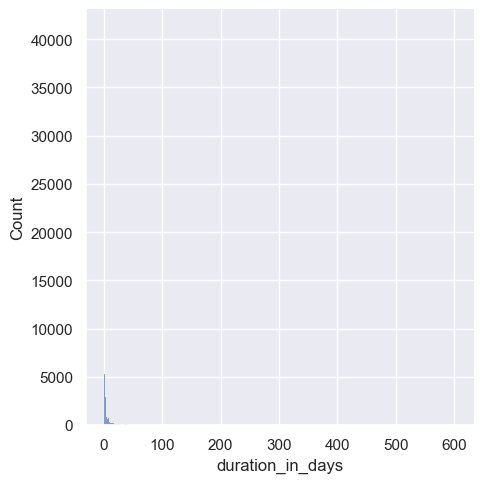

In [29]:
# using seaborn library for visualizations 
sns.set_theme() # use this if you dont want the visualizations to be default matplotlibstyle
sns.displot(df_closed, x="duration_in_days", binwidth=1)

From the plot above, the data seems to be skewed right meaning the right tail is much longer than the left. Let's try playing with different bin widths. 

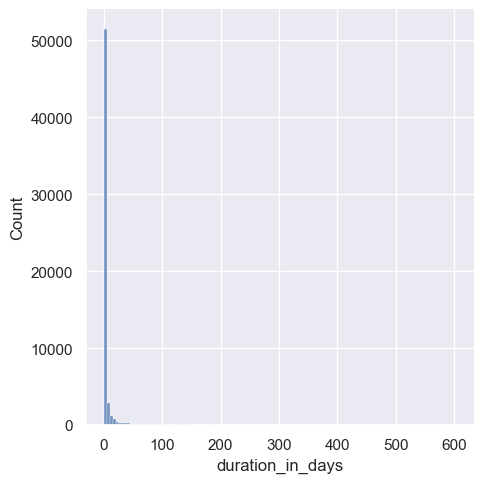

In [30]:
# trying different bin sizes 
sns.displot(df_closed, x="duration_in_days", binwidth=5)

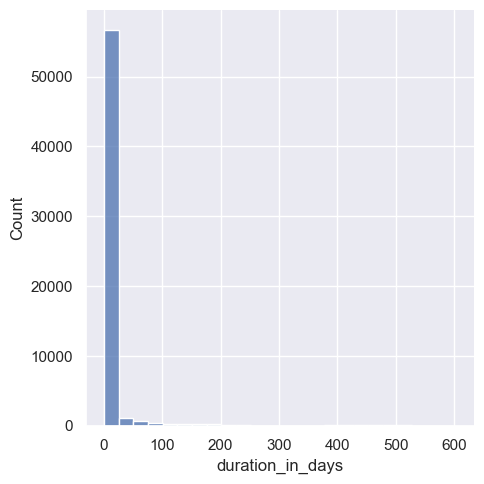

In [31]:
# trying different bin sizes
sns.displot(df_closed, x="duration_in_days", binwidth=25)

Since the data is heavily skewed, let's apply log transformation to the data. The log transformation will *hopefully* reduce or remove the skewness of the original data. The assumption is that the original data follows a log-normal distribution. 

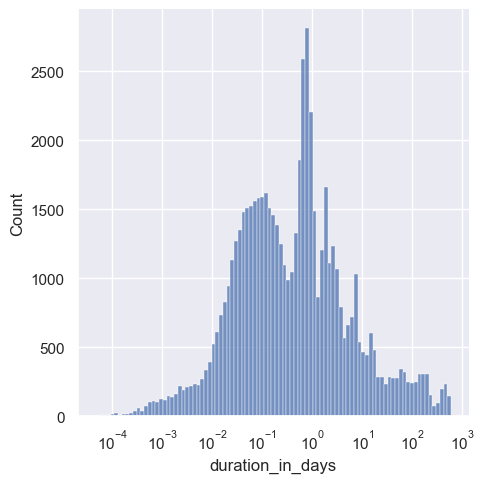

In [32]:
# log-scale transformation since the data is heavliy skewed 
# add bin_width parameter to change bin sizes
sns.displot(df_closed, x="duration_in_days", log_scale=True)

### Which neighborhoods had the most requests from January 2022 - March 2022? 

To answer this question, we will take a look at the ```neighborhood``` column. 

In [33]:
# has 25 unique values so a pie chart probably is not the best option
len(df_closed['neighborhood'].unique()) 

25

Text(0.5, 1.0, 'Number of Requests by Neighborhood')

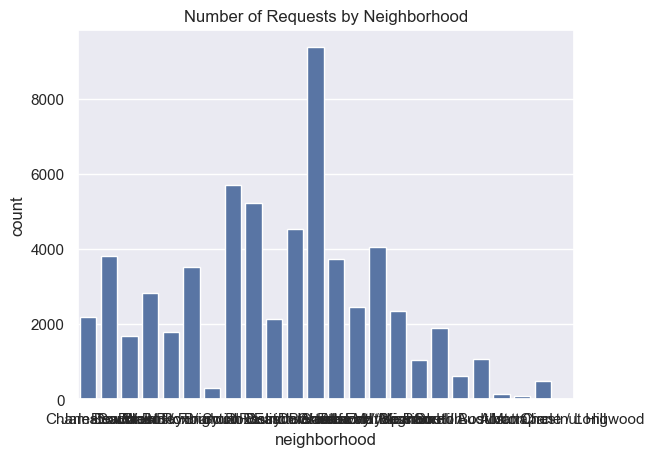

In [34]:
# plot neighborhood counts 
sns.countplot(x="neighborhood", data=df_closed).set_title('Number of Requests by Neighborhood')

Yikes! The x-axis labels are pretty hard to read. Let's fix that by plotting the bars horizontally. 

Text(0.5, 1.0, 'Number of Requests by Neighborhood')

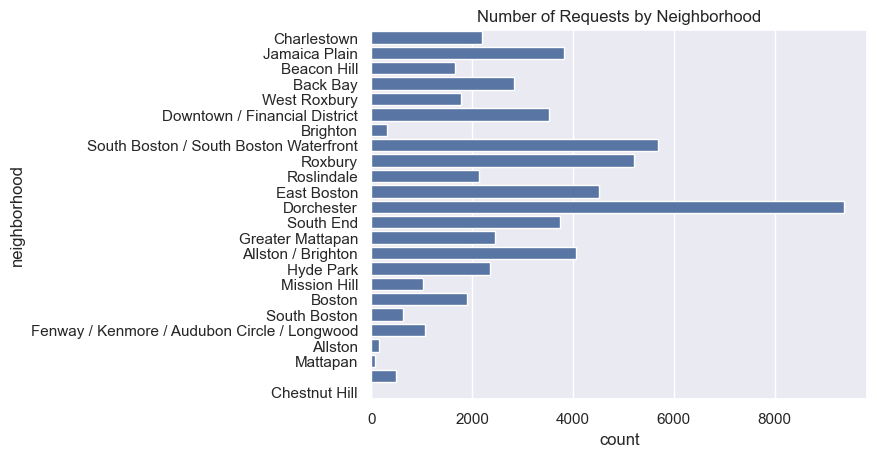

In [35]:
# fixing orientation of the labels 
sns.countplot(y="neighborhood", data=df_closed).set_title('Number of Requests by Neighborhood')

From the plot we can see that Dorchester has the most requests, followed by South Boston/South Boston Waterfront, then Roxbury. There's a bar that doesn't have a name...that's strange. Let's display the exact counts for each neighborhood. 

In [36]:
# displaying number of requests by neighborhood in table form 
df_closed['neighborhood'].value_counts()

neighborhood
Dorchester                                      9366
South Boston / South Boston Waterfront          5692
Roxbury                                         5215
East Boston                                     4521
Allston / Brighton                              4056
Jamaica Plain                                   3820
South End                                       3733
Downtown / Financial District                   3525
Back Bay                                        2823
Greater Mattapan                                2460
Hyde Park                                       2357
Charlestown                                     2186
Roslindale                                      2134
Boston                                          1900
West Roxbury                                    1786
Beacon Hill                                     1670
Fenway / Kenmore / Audubon Circle / Longwood    1064
Mission Hill                                    1032
South Boston                     

There are 476 requests without a neighborhood label. 

In [37]:
# uncomment and run the line below to check for the empty neighborhood label 
# print(df_closed['neighborhood'].unique())

# gather the rows where neighborhood == ' ' 
df_no_neighborhood = df_closed.loc[(df_closed['neighborhood'] == ' ')]
df_no_neighborhood.head(15) # display first 15 rows

,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,case_duration,duration_in_days
576,577,101004114256,2022-01-02 15:28:00,2022-01-12 03:30:00,2022-01-10 14:41:42,ONTIME,Closed,Case Closed. Closed date : 2022-01-10 19:41:42...,printed,Parks & Recreation Department,...,,,NaN,NaN,42.294516,-71.153609,0101000020E6100000D55BB5BCD4C951C0B84E44B3B225...,Self Service,7 days 23:13:42,7.967847
772,773,101004114573,2022-01-03 04:43:00,2022-01-05 04:43:00,2022-01-04 05:10:41,ONTIME,Closed,Case Closed. Closed date : Tue Jan 04 10:10:41...,Unsanitary Conditions - Employees,Inspectional Services,...,,,NaN,NaN,NaN,NaN,NaN,Constituent Call,1 days 00:27:41,1.019225
935,936,101004114865,2022-01-03 08:18:00,NaT,2022-01-04 09:00:43,ONTIME,Closed,Case Closed. Closed date : Tue Jan 04 14:00:43...,Park Improvement: Ronan Park - BPRD,Parks & Recreation Department,...,,,NaN,NaN,42.304110,-71.062630,0101000020E6100000917CAF2202C451C07121F916ED26...,Employee Generated,1 days 00:42:43,1.029664
1453,1454,101004115729,2022-01-04 06:11:00,2022-02-03 06:11:34,2022-01-05 04:43:58,ONTIME,Closed,Case Closed. Closed date : Wed Jan 05 09:43:58...,DISPATCHED Heat - Excessive Insufficient,Inspectional Services,...,,,NaN,NaN,NaN,NaN,NaN,Constituent Call,0 days 22:32:58,0.939560
1516,1517,101004115813,2022-01-04 07:06:54,2022-01-06 07:07:26,2022-01-04 09:57:18,ONTIME,Closed,Case Closed. Closed date : Tue Jan 04 14:57:18...,Improper Storage of Trash (Barrels),Public Works Department,...,,,NaN,NaN,NaN,NaN,NaN,Constituent Call,0 days 02:50:24,0.118333
1897,1898,101004116451,2022-01-04 21:15:02,2022-01-12 03:30:00,2022-01-05 02:40:59,ONTIME,Closed,Case Closed. Closed date : 2022-01-05 07:40:59...,Cemetery Maintenance Request,Parks & Recreation Department,...,,,NaN,NaN,NaN,NaN,NaN,Constituent Call,0 days 05:25:57,0.226354
2003,2004,101004116598,2022-01-05 03:23:27,2022-01-19 03:30:00,2022-01-05 03:50:32,ONTIME,Closed,Case Closed. Closed date : 2022-01-05 08:50:32...,PARKS: Complaint,Mayor's 24 Hour Hotline,...,,,NaN,NaN,NaN,NaN,NaN,Constituent Call,0 days 00:27:05,0.018808
2099,2100,101004116744,2022-01-05 04:57:00,2022-01-12 04:58:04,2023-07-28 00:35:56,OVERDUE,Closed,Case Closed. Closed date : Fri Jul 28 04:35:56...,Equipment Repair: Medal of Honor Park - BPRD,Parks & Recreation Department,...,,,NaN,NaN,42.336613,-71.032337,0101000020E6100000F741EECD11C251C008FE8C23162B...,Constituent Call,568 days 19:38:56,568.818704
2119,2120,101004116775,2022-01-05 05:14:00,2022-01-12 05:15:36,2022-01-05 05:16:31,ONTIME,Closed,Case Closed Case Noted,Ground Maintenance: Sweeney Playground - BPRD,Parks & Recreation Department,...,,,NaN,NaN,42.337241,-71.051581,0101000020E6100000C59D9C184DC351C0980C06B32A2B...,Employee Generated,0 days 00:02:31,0.001748
2340,2341,101004117130,2022-01-05 09:25:00,2022-01-14 09:25:51,2022-02-10 05:59:15,OVERDUE,Closed,Case Closed. Closed date : Thu Feb 10 10:59:15...,printed,Parks & Recreation Department,...,,,NaN,NaN,42.321412,-71.088664,0101000020E610000016AACDACACC551C07911DB082429...,Constituent Call,35 days 20:34:15,35.857118


In [38]:
print(df_no_neighborhood['latitude'].unique())
print(df_no_neighborhood['longitude'].unique())

[42.294516           nan 42.3041104  42.33661312 42.33724058 42.32141219
 42.34516806 42.35046694 42.34493332 42.2758377  42.31167752 42.29508845
 42.36110634 42.28794909 42.39329593 42.38955433 42.32235584 42.36568931
 42.33629881 42.37230192 42.24551863 42.34966436 42.33616981 42.26163626
 42.34030789 42.27999356 42.28820179 42.37675526 42.38963138 42.35794553
 42.28228589 42.32844047 42.25611906 42.26232777 42.36804986 42.24328715
 42.24338644 42.24526421 42.24321985 42.32430554 42.36353593 42.36323421
 42.37247538 42.3396485  42.39812282 42.37534713 42.3967721  42.25774264
 42.36825668 42.32624019 42.31104669 42.31747464 42.38535606 42.3248107
 42.3227959  42.32723596 42.31471571 42.35798814 42.37657328 42.37651798
 42.32626408 42.31715702 42.35832673 42.33070473 42.37440052 42.35681992
 42.37420066 42.35713859 42.38036225 42.36355674 42.38231012 42.27511509
 42.38533656 42.31407664 42.38811764 42.38786849 42.3734846  42.24095785
 42.37172506 42.34005562 42.33932379 42.35919869 42.

The latitude and longitude values are the same for all of the rows without a ```neighborhood``` value. We can use the *Geopy* module to convert the latitude and longitude coordinates to a place or location address - also referred to as reverse geocoding. 

In [40]:
# import geopy 
from geopy.geocoders import Nominatim 

# make a Nominatim object and initialize, specify a user_agent 
# Nominatim requires this value to be set to your application name, to be able to limit the number of requests per application
# Nominatim is a free service but provides low request limits: https://operations.osmfoundation.org/policies/nominatim/
geolocator = Nominatim(user_agent="eda_geotest")

# set latitude and longitude and convert to string 
lat = str(df_no_neighborhood['latitude'].unique()[0])
long = str(df_no_neighborhood['longitude'].unique()[0])

# get the location information
location = geolocator.reverse(lat + "," +long)

# display location information, add .raw for more details
print(location.raw)

{'place_id': 18061366, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 997190053, 'lat': '42.29455195', 'lon': '-71.15345176688841', 'class': 'leisure', 'type': 'pitch', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'leisure', 'name': '', 'display_name': 'Rickerhill Road, West Roxbury, Boston, Suffolk County, Massachusetts, 02467, United States', 'address': {'road': 'Rickerhill Road', 'suburb': 'West Roxbury', 'city': 'Boston', 'county': 'Suffolk County', 'state': 'Massachusetts', 'ISO3166-2-lvl4': 'US-MA', 'postcode': '02467', 'country': 'United States', 'country_code': 'us'}, 'boundingbox': ['42.2937511', '42.2952034', '-71.1542998', '-71.1527585']}


Quick Google Maps search of the location confirms that (42.3594, -71.0587) is Government Center. The output from *geopy* is Sear's Crescent and Sears' Block which are a pair of buildings adjacent to City Hall and City Hall Plaza, Government Center.

Another quick look at the output from *geopy* shows that the ```lat``` and ```lon``` values are similar but different from the latitude and longitude values in the dataset. 

The requests without a neighborhood value have a general location of Government Center. At least we can confirm that requests without a neighborhood value are not outside of Boston or erroneous. 


### During January 2022 - March 2022, where did the most case requests come from?

To answer this question, we will take a look at the ```source``` column. 

In [41]:
# has only 5 unique values so in this case we can use a pie chart 
len(df_closed['source'].unique())

5

In [42]:
# displaying the number of requests by each source type 
df_closed['source'].value_counts()

source
Citizens Connect App    32997
Constituent Call        21403
City Worker App          3953
Self Service             1664
Employee Generated       1053
Name: count, dtype: int64

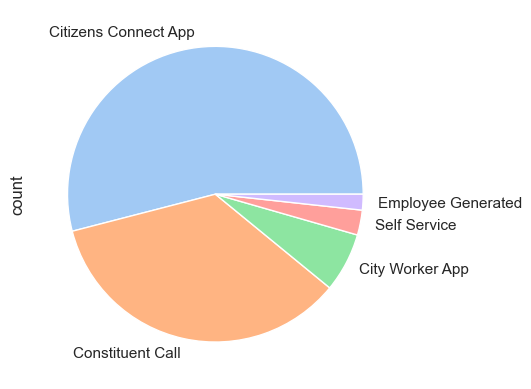

In [43]:
# visualizing the breakdown of where case requests come from 
# seaborn doesn't have a default pie chart but you can add seaborn color palettes to matplotlib plots

colors = sns.color_palette('pastel')[0:5]
ax = df_closed['source'].value_counts().plot.pie(colors=colors)

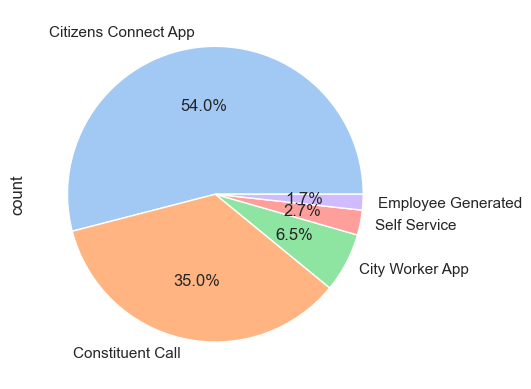

In [44]:
# label each slice with the percentage of requests per source 
ax = df_closed['source'].value_counts().plot.pie(colors=colors,autopct='%1.1f%%')

# run the following to remove the default column name label *source*
#ax.yaxis.set_visible(False)

From the pie chart, 54% of the requests from January 2022 - March 2022 came from the Citizens Connect App, 35.4% came from a Constituent Call, followed by 6.4% from the City Worker App. 

### How many different types of requests were there from January 2022 - March 2022?

To answer this question, we will take a look at the ```reason``` column. 

In [45]:
# how many different reasons are there 
len(df_closed['reason'].unique())

38

In [46]:
# number of requests by reason 
df_closed['reason'].value_counts()

reason
Enforcement & Abandoned Vehicles     15069
Code Enforcement                     10437
Street Cleaning                       8487
Sanitation                            5993
Highway Maintenance                   5293
Signs & Signals                       2437
Street Lights                         1970
Recycling                             1690
Housing                               1538
Building                              1372
Needle Program                        1298
Trees                                 1121
Park Maintenance & Safety             1024
Graffiti                               592
Animal Issues                          582
Environmental Services                 562
Employee & General Comments            377
Health                                 343
Administrative & General Requests      263
Notification                           141
Traffic Management & Engineering       119
Abandoned Bicycle                      110
Sidewalk Cover / Manhole                53
Catc

There were 38 different types of requests from January 2022 - March 2022, the top three with most requests being *Enforcement & Abandoned Vehicles* with 14,908 requests, *Code Enforcement* with 10,437 requests, then *Street Cleaning* with 8,477 requests. 

In [47]:
# top case request reason by neighborhood 
df_closed.groupby(['neighborhood'])['reason'].describe()

,count,unique,top,freq
neighborhood,,,,
,491,17,Employee & General Comments,287
Allston,151,17,Code Enforcement,30
Allston / Brighton,4056,31,Enforcement & Abandoned Vehicles,1062
Back Bay,2823,29,Enforcement & Abandoned Vehicles,674
Beacon Hill,1670,23,Street Cleaning,468
Boston,1900,30,Enforcement & Abandoned Vehicles,384
Brighton,310,22,Enforcement & Abandoned Vehicles,67
Charlestown,2186,27,Enforcement & Abandoned Vehicles,768
Chestnut Hill,4,3,Health,2


In [48]:
# get counts for each request reason by neighborhood 
reason_by_neighborhood = df_closed.groupby(['neighborhood', 'reason'])['duration_in_days'].describe()[['count']]
reason_by_neighborhood

count
neighborhood reason                                 
             Cemetery                            7.0
             Code Enforcement                    9.0
             Employee & General Comments       287.0
             Enforcement & Abandoned Vehicles   17.0
             Environmental Services              3.0
...                                              ...
West Roxbury Signs & Signals                   111.0
             Street Cleaning                   159.0
             Street Lights                      50.0
             Traffic Management & Engineering    4.0
             Trees                             120.0

[594 rows x 1 columns]

In [49]:
# run this cell to write the reason by neighborhood to a csv to see all rows of data 
reason_by_neighborhood.to_csv('reasons_by_neighborhood.csv')

In [50]:
# let's take a look at the South End neighborhood specifically 
south_end_df = df_closed.loc[(df_closed['neighborhood'] == 'South End')]
south_end_df.groupby(['reason'])['duration_in_days'].describe()[['count']]

,count
reason,
Abandoned Bicycle,8.0
Administrative & General Requests,10.0
Air Pollution Control,4.0
Animal Issues,16.0
Building,52.0
Code Enforcement,773.0
Employee & General Comments,1.0
Enforcement & Abandoned Vehicles,712.0
Environmental Services,48.0


### What types of cases typically take the longest to resolve?

To answer this question, let's take a look at the ```duration_in_days``` and ```reason``` columns.

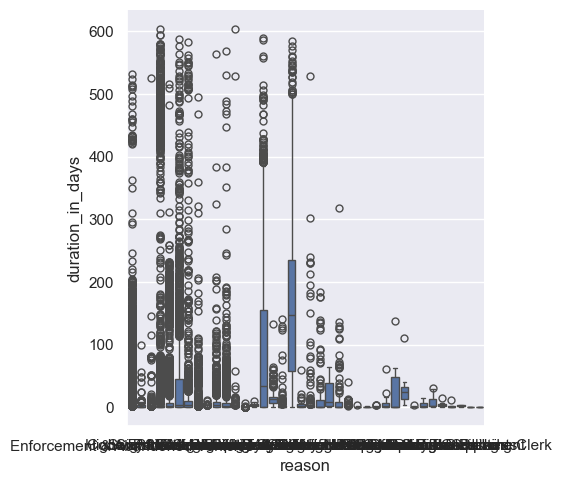

In [51]:
# what types of cases typically take the longest 
# case_duration by reason 

sns.catplot(x="reason", y="duration_in_days", kind="box", data=df_closed,)

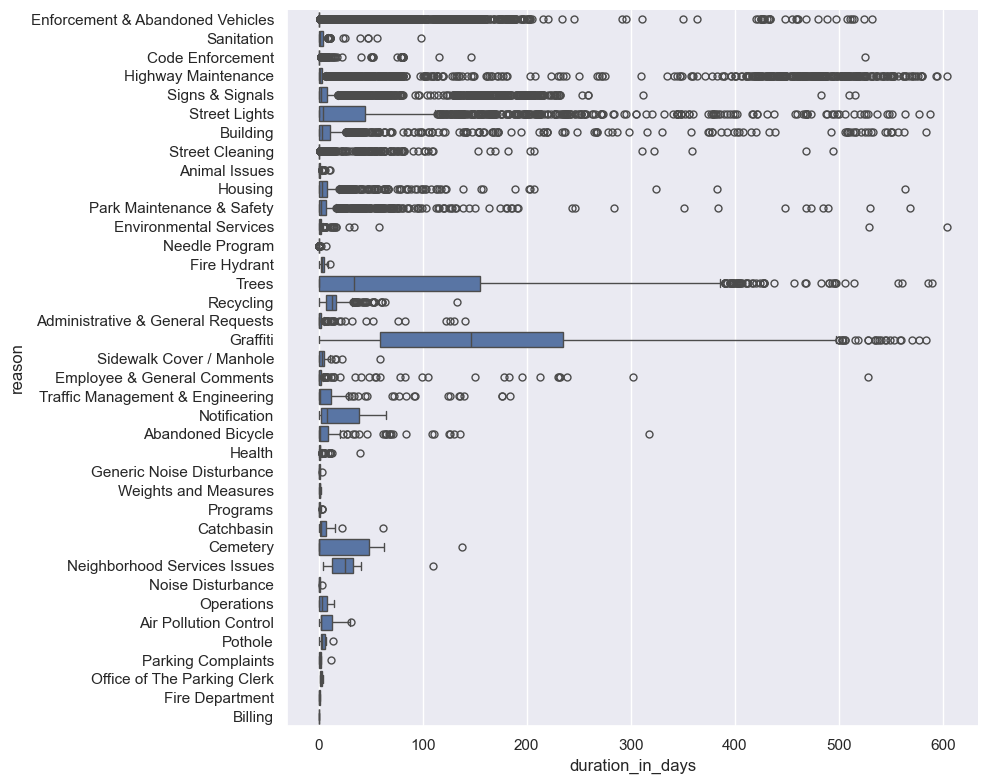

In [52]:
# The chart is kind of difficult to read... 
# Let's fix the size of the chart and flip the labels on the x-axis 

sns.catplot(y="reason", x="duration_in_days", kind="box", data=df_closed,
            height = 8, aspect = 1.25)

Box plots display the five-number-summary, which includes: the minimum, the maximum, the sample median, and the first and third quartiles. 

The box plot shows the distribution ```duration_in_days``` in a way that allows comparisions between case ```reasons```. Box plots show the distribution of a numerical variable broken down by a categorical variable. 

The box shows the quartiles of the ```duration_in_days``` and the whiskers extend to show the rest of the distribution (minimum and maximum). Points that are shown outside of the whiskers are determined to be *outliers*. The line inside the box is the median. 

In [53]:
# descriptive statistics for duration_in_days by case reason 
# box plot in table form 
df_closed.groupby(['reason'])['duration_in_days'].describe()

,count,mean,std,min,25%,50%,75%,max
reason,,,,,,,,
Abandoned Bicycle,110.0,18.958664,43.377611,0.005799,0.614913,1.185561,9.242028,317.709433
Administrative & General Requests,263.0,4.802359,17.893667,0.000081,0.116655,0.790243,2.018640,140.842130
Air Pollution Control,13.0,8.872239,10.842552,0.001528,1.787616,1.790822,13.153194,30.967199
Animal Issues,582.0,0.901953,1.086186,0.000127,0.075110,0.701597,1.235906,11.121447
Billing,1.0,0.009178,NaN,0.009178,0.009178,0.009178,0.009178,0.009178
Building,1372.0,27.282942,86.255114,0.000046,0.714560,3.006603,10.899311,583.493900
Catchbasin,40.0,6.301467,10.713385,0.000174,0.946927,2.444572,7.486829,61.852523
Cemetery,7.0,33.692262,52.086613,0.000127,0.113744,0.594907,48.409045,138.205220
Code Enforcement,10437.0,0.707527,6.281534,0.000069,0.054375,0.234653,0.752431,524.912940


Graffiti cases take on average take the longests time to resolve, 60.796 days. 

Do cases typically take longer in one neighborhood over another?

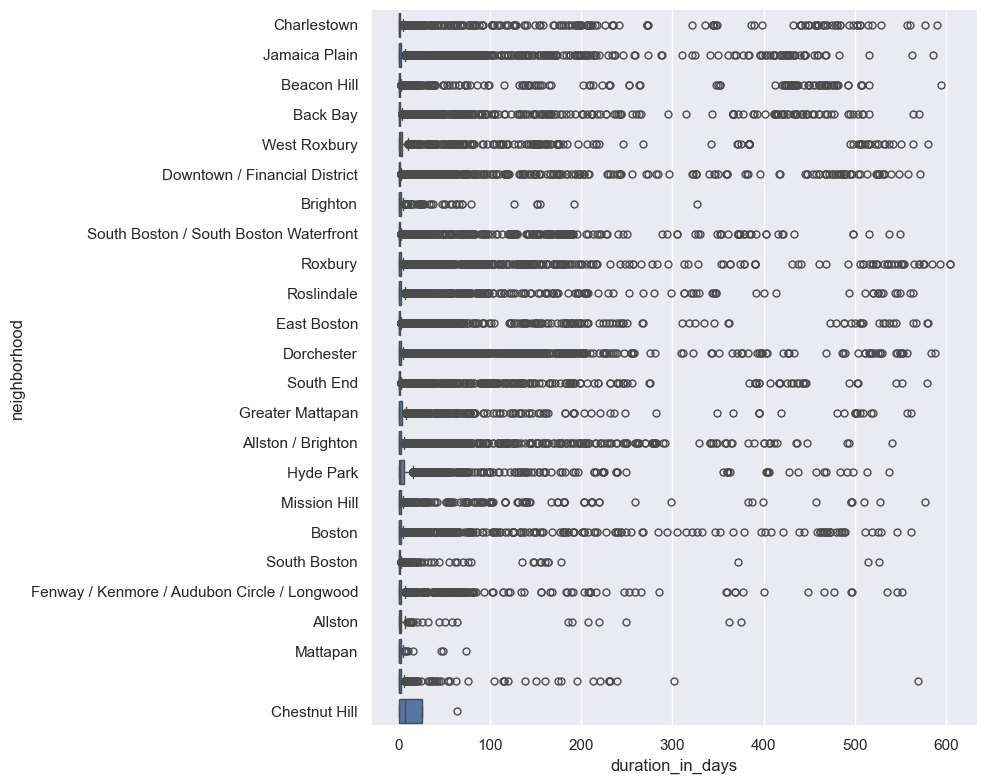

In [54]:
# do cases typically take longer in one neighborhood over another?

sns.catplot(y="neighborhood", x="duration_in_days", kind="box", data=df_closed,
            height = 8, aspect = 1.25)

The box plot above shows several outliers for each category (```neighborhood```) making it difficult to read and quite overwhelming. 

Let's display the information in table form. 

In [55]:
# in table form 
df_closed.groupby(['neighborhood'])['duration_in_days'].describe()

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
,491.0,10.833381,43.836903,0.000127,0.061603,0.734352,2.676522,568.818704
Allston,151.0,15.539769,56.261137,0.000058,0.136285,0.942199,2.944201,375.104931
Allston / Brighton,4056.0,11.868263,46.064457,0.000185,0.080631,0.554369,2.507882,540.453831
Back Bay,2823.0,16.855041,67.367068,0.000197,0.045862,0.247512,1.528461,570.771458
Beacon Hill,1670.0,19.272320,81.824212,0.000301,0.045593,0.192951,1.080414,594.315162
Boston,1900.0,18.526613,71.031982,0.000046,0.046267,0.407917,1.934959,562.049248
Brighton,310.0,8.123019,29.190079,0.000266,0.079433,0.585486,2.148709,326.748692
Charlestown,2186.0,17.604676,72.191774,0.000081,0.072396,0.325388,1.674595,589.909977
Chestnut Hill,4.0,19.085666,30.059715,0.148611,0.185148,6.448744,25.349262,63.296563


In January 2022 - March 2022, cases took the longest in Chestnut Hill. Cases typically lasted on average 19.075 days but there were only 4 cases located in Chestnut Hill during this time. Smaller sample sizes could mean more variability (look at standard deviation to explain the spread of observations).  

We can further look at the population of Chestnut Hill versus the other neighborhoods to try and make sense of this low case count. Additionally, we can broaden the time period of the cases to see if Chestnut Hill still has a low case count. 

From the table above we can see how long cases take by each neighborhood, it would be interesting to further breakdown by case reason for each neighborhood. 

### Wrap Up, Next Steps 

Further analysis could be done using the 311 dataset. Using the 311 data from previous years, we can see how number of requests have changed over the years, or how case duration may have changed over the years. 

Since most requests have latitude and longitude coordinates it could be interesting to plot each case request on a map to see if there are clusters of requests in certain locations.  

Next steps could include gathering demographic data to overlay on top of the 311 dataset for further analysis. Another possible next step would be to build a model to predict how long a request could take given the request reason, subject, location, source, etc. 